In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.1MB/s 
     |████████████████████████████████| 6.5MB 32.8MB/s 
     |████████████████████████████████| 15.3MB 205kB/s 


In [2]:
import geopandas

In [102]:
nybb_path = geopandas.datasets.get_path('nybb')

In [103]:
 boros = geopandas.read_file(nybb_path)

In [104]:
boros.set_index('BoroCode', inplace=True)

In [105]:
boros.sort_index(inplace=True)

In [106]:
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [110]:
boros['geometry']=boros['geometry'].convex_hull


In [111]:
boros["Area"]=boros.area
boros["Area"]

BoroCode
1    1.098707e+09
2    1.658522e+09
3    2.509323e+09
4    5.229325e+09
5    2.062720e+09
Name: Area, dtype: float64

In [88]:
import matplotlib.pyplot as plt

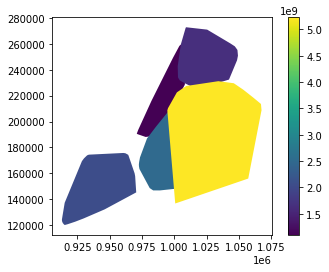

In [112]:
boros.plot("Area", legend=True)

BoroCode
1    MULTIPOLYGON (((11019.056 43655.316, 10740.519...
2    MULTIPOLYGON (((42621.806 84228.265, 42585.913...
3    MULTIPOLYGON (((50976.479 6374.797, 50802.862 ...
4    MULTIPOLYGON (((59406.077 11073.814, 59378.007...
5    MULTIPOLYGON (((17.022 643.332, 27.216 641.634...
dtype: geometry

In [90]:
boros["boundary"]=boros.boundary
boros["boundary"]

BoroCode
1    MULTILINESTRING ((981219.056 188655.316, 98094...
2    MULTILINESTRING ((1012821.806 229228.265, 1012...
3    MULTILINESTRING ((1021176.479 151374.797, 1021...
4    MULTILINESTRING ((1029606.077 156073.814, 1029...
5    MULTILINESTRING ((970217.022 145643.332, 97022...
Name: boundary, dtype: geometry

In [91]:
import numpy as np
from shapely.geometry import mapping

In [95]:
boros.geometry=boros.geometry.translate(-970000,-145000)

In [96]:
g = [i for i in boros.geometry]
g

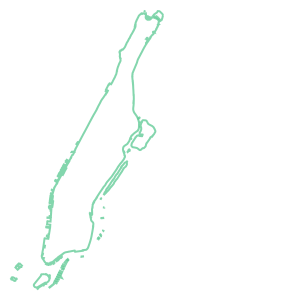

In [100]:
g[0].boundary

In [97]:
ext=[]
c=0
for i in range(len(g)):
  all_coords = []
  for b in g[i].boundary: # for first feature/row
    coords = np.dstack(b.coords.xy).tolist()
    #print(*coords)
    all_coords.append((*coords))                 
    c+=1
   #all_coords has 33 subarrays
  a=np.true_divide(all_coords[0],10)
  ext.append(a.astype(int).tolist())
print(len(ext)) 
ext

5


[[[1121, 4365],
  [1094, 4343],
  [1087, 4351],
  [1181, 4425],
  [1183, 4427],
  [1186, 4429],
  [1193, 4435],
  [1198, 4426],
  [1191, 4421],
  [1188, 4419],
  [1186, 4417],
  [1121, 4365]],
 [[4282, 8422],
  [4278, 8416],
  [4270, 8419],
  [4250, 8416],
  [4233, 8432],
  [4222, 8438],
  [4216, 8448],
  [4234, 8463],
  [4252, 8470],
  [4273, 8458],
  [4282, 8441],
  [4282, 8422]],
 [[5117, 637],
  [5100, 632],
  [5087, 633],
  [5064, 623],
  [5056, 630],
  [5044, 645],
  [5035, 657],
  [5026, 672],
  [5021, 683],
  [5021, 709],
  [5018, 740],
  [5012, 758],
  [5008, 782],
  [5003, 811],
  [5040, 905],
  [5077, 928],
  [5102, 962],
  [5121, 979],
  [5136, 994],
  [5180, 980],
  [5193, 977],
  [5210, 967],
  [5222, 958],
  [5237, 939],
  [5237, 928],
  [5249, 908],
  [5259, 885],
  [5271, 872],
  [5278, 852],
  [5275, 830],
  [5271, 816],
  [5269, 800],
  [5267, 785],
  [5260, 768],
  [5252, 753],
  [5244, 737],
  [5235, 722],
  [5225, 709],
  [5222, 702],
  [5207, 694],
  [5188, 693],

In [16]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=5999 sha256=e96cf83fae64f2ec38de1e9966a14b314b4c0eb2b8c6237ac2aadd4f514a5b74
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [80]:
import pickle

In [98]:
#dumping list to pickle file
file_name = "ext_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(ext, open_file)
open_file.close()



In [99]:
open_ = open(file_name, "rb")
loaded_list = pickle.load(open_)
loaded_list[0]

[[1121, 4365],
 [1094, 4343],
 [1087, 4351],
 [1181, 4425],
 [1183, 4427],
 [1186, 4429],
 [1193, 4435],
 [1198, 4426],
 [1191, 4421],
 [1188, 4419],
 [1186, 4417],
 [1121, 4365]]

In [21]:
gdf = boros.set_index("BoroName")
gdf["area"] = gdf.area
gdf["area"]

BoroName
Manhattan        6.364712e+08
Bronx            1.186926e+09
Brooklyn         1.937478e+09
Queens           3.045214e+09
Staten Island    1.623822e+09
Name: area, dtype: float64

In [ ]:
a = gdf["area"]
a=np.array(a) 
a

In [ ]:
import matplotlib.pyplot as plt

plt.pie(a,labels= ["Manhattan","Bronx","Brooklyn","Queens","Staten Island"] )
plt.show()


In [ ]:
import matplotlib.pyplot as plt 

x_axis=[i for i in range(10,490)]
print(x_axis)
'''y_axis=timer 

plt.plot(x_axis,y_axis) 
plt.show()'''


In [ ]:
import cv2 as cv2
img=np.zeros((2000, 2000, 3), dtype = "uint8")
cv2.polylines(img,ext[0],True,(255,0,0),2)